<font color='orange'>**Please create your own copy before starting modification**</font>

Dependencies: Add Your dependencies here



In [ ]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.base import BaseEstimator, TransformerMixin
import re
import string
import os
from pprint import pprint
import collections
import nltk
import spacy
from sklearn.preprocessing import OrdinalEncoder

Load the data

In [ ]:
data = pd.read_csv('/content/train.csv')
#  data = sns.load_dataset('train.csv')

In [ ]:
data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


Plot the count for each target

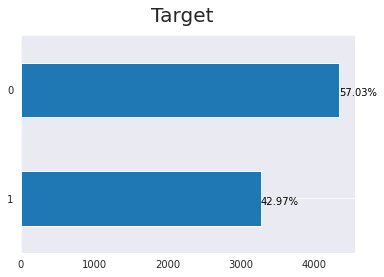

In [ ]:
ax = data[ 'target'].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle('Target', fontsize=20)
plt.show()

Print the unique keywords

In [ ]:
from collections import Counter
x = data['keyword']
unique_keywords = list(Counter(x).keys())
count_unique_keywords = list(Counter(x).values()) 
#print("THE DICTIONARY FOR UNIQUE KEYWORDS--->")
#print(Counter(x))
#print("<-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------->")
print("THE UNQUE KEYWORDS ARE:")
print(unique_keywords)

THE UNQUE KEYWORDS ARE:
[nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident', 'ambulance', 'annihilated', 'annihilation', 'apocalypse', 'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked', 'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze', 'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood', 'bloody', 'blown%20up', 'body%20bag', 'body%20bagging', 'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse', 'buildings%20burning', 'buildings%20on%20fire', 'burned', 'burning', 'burning%20buildings', 'bush%20fires', 'casualties', 'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency', 'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided', 'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew', 'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris', 'deluge', 'deluged', 'demolish', 'demolished', 'demolition', 'derail', 'derailed', 'derailment', 'desolate', 'desolation', 'destroy', 'destroyed', 'destruc

Plot the count of each keyword

In [ ]:
print("THE COUNT OF EACH UNIQUE KEYWORD:")
for i in range(0,len(unique_keywords)):
  print("THE UNIQUE KEYWORD--->","  ",unique_keywords[i],"  ","<--AND-->","IT'S COUNT IS--->",count_unique_keywords[i])

THE COUNT OF EACH UNIQUE KEYWORD:
THE UNIQUE KEYWORD--->    nan    <--AND--> IT'S COUNT IS---> 61
THE UNIQUE KEYWORD--->    ablaze    <--AND--> IT'S COUNT IS---> 36
THE UNIQUE KEYWORD--->    accident    <--AND--> IT'S COUNT IS---> 35
THE UNIQUE KEYWORD--->    aftershock    <--AND--> IT'S COUNT IS---> 34
THE UNIQUE KEYWORD--->    airplane%20accident    <--AND--> IT'S COUNT IS---> 35
THE UNIQUE KEYWORD--->    ambulance    <--AND--> IT'S COUNT IS---> 38
THE UNIQUE KEYWORD--->    annihilated    <--AND--> IT'S COUNT IS---> 34
THE UNIQUE KEYWORD--->    annihilation    <--AND--> IT'S COUNT IS---> 29
THE UNIQUE KEYWORD--->    apocalypse    <--AND--> IT'S COUNT IS---> 32
THE UNIQUE KEYWORD--->    armageddon    <--AND--> IT'S COUNT IS---> 42
THE UNIQUE KEYWORD--->    army    <--AND--> IT'S COUNT IS---> 34
THE UNIQUE KEYWORD--->    arson    <--AND--> IT'S COUNT IS---> 32
THE UNIQUE KEYWORD--->    arsonist    <--AND--> IT'S COUNT IS---> 34
THE UNIQUE KEYWORD--->    attack    <--AND--> IT'S COUNT I

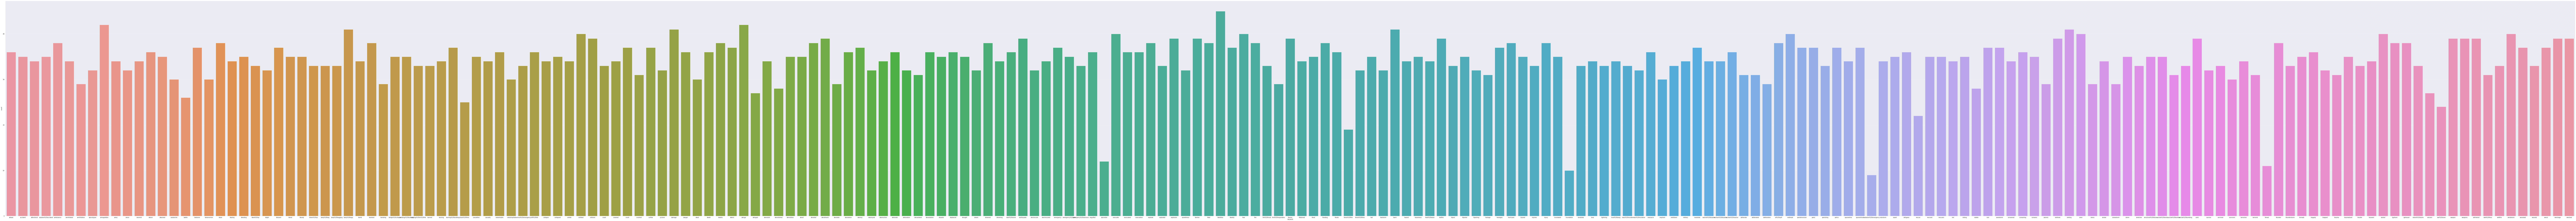

In [ ]:
fig_dims = (350,30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="keyword", data=data,ax=ax)

Is there any correlation of the length of a tweet with its target. Try to visualize

In [ ]:
tweet_length = []
tweet = ''
for tweet in data['text']:
  length = len(tweet)
  tweet_length.append(length)
#print(tweet)
df = pd.DataFrame(tweet_length,columns = ['Tweet_lengths'])
df['target'] = data.target
df

,Tweet_lengths,target
0,69,1
1,38,1
2,133,1
3,65,1
4,88,1
...,...,...
7608,83,1
7609,125,1
7610,65,1
7611,137,1


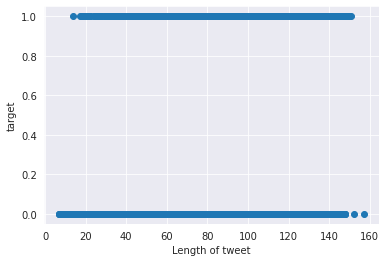

In [ ]:
plt.xlabel("Length of tweet")
plt.ylabel("target")
plt.scatter(tweet_length,data['target'])

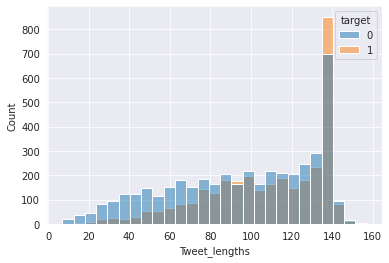

In [ ]:
sns.histplot(data=df, x="Tweet_lengths", hue="target",color='RdBu')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


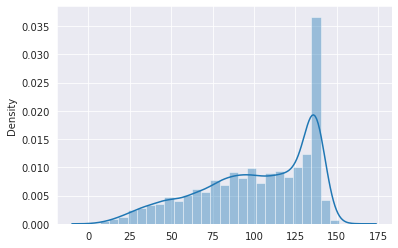

In [ ]:
sns.distplot(x=df['Tweet_lengths'],hist =True,kde = True,)

Print the number of null values in each column

In [ ]:
print("THE NUMBER OF NULL VALUES IN EACH COLUMN")
data.isnull().sum()

THE NUMBER OF NULL VALUES IN EACH COLUMN


id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Remove the null values

In [ ]:
data['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [ ]:
data['location'].value_counts()

USA                  104
New York              71
United States         50
London                45
Canada                29
                    ... 
Bristol                1
Mountains              1
Chicago, IL 60607      1
Benedict College       1
Notts                  1
Name: location, Length: 3341, dtype: int64

In [ ]:
data.dropna(axis=0,how='any',inplace=True)
data

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...,...
7575,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0


Remove:


1.   Double Spaces
2.   Hypens and arrows
3.   Emojis
4.   URL
5.   Any other non english or special symbol





In [ ]:
#removal of urls
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
data["text_copy"] = data["text"].apply(lambda text: remove_urls(text))
data[(48 <= data.id) & (data.id <=59)]

,id,keyword,location,text,target,text_copy
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,@bbcmtd Wholesale Markets ablaze
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,We always try to bring the heavy. #metal #RT
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,#AFRICANBAZE: Breaking news:Nigeria flag set a...
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,Crying out for more! Set me ablaze
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0,@PhDSquares #mufc they've built so much hype a...
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,INEC Office in Abia Set Ablaze -
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0,Ablaze for you Lord :D
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,Check these out: #nsfw


In [ ]:
#removal of emoji
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#remove_emoji("game is on 🔥🔥")
data["text_copy"] = data["text_copy"].apply(lambda text: remove_emoji(text))
data[(48 <= data.id) & (data.id <=59)]

,id,keyword,location,text,target,text_copy
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,@bbcmtd Wholesale Markets ablaze
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,We always try to bring the heavy. #metal #RT
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,#AFRICANBAZE: Breaking news:Nigeria flag set a...
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,Crying out for more! Set me ablaze
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0,@PhDSquares #mufc they've built so much hype a...
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,INEC Office in Abia Set Ablaze -
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0,Ablaze for you Lord :D
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,Check these out: #nsfw


In [ ]:
#removal of emoticons
# Thanks : https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [ ]:
#removal of emoticons
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

#remove_emoticons("Hello :-)")
data["text_copy"] = data["text_copy"].apply(lambda text: remove_emoticons(text))
data[(data.id==10718)]

,id,keyword,location,text,target,text_copy
7492,10718,wreck,"Arlington, TX",Got in a car wreck. The car in front of me did...,0,Got in a car wreck. The car in front of me did...


In [ ]:
#removal of hypen and arrows
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data["text_copy"] = data["text_copy"].apply(lambda text: remove_punctuation(text))
data[(52 <= data.id) & (data.id <=57)]

,id,keyword,location,text,target,text_copy
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,Crying out for more Set me ablaze
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0,PhDSquares mufc theyve built so much hype arou...
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,INEC Office in Abia Set Ablaze
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0,Ablaze for you Lord


In [ ]:
#remove special symbols and numbers
def remove_special(text):
  pattern = re.compile(r'[^A-Za-z]')
  return re.sub(pattern,' ',text)
data["text_copy"] = data["text_copy"].apply(lambda text: remove_special(text))
data[(79 <= data.id) & (data.id <=97)]

,id,keyword,location,text,target,text_copy
55,79,ablaze,USA,#Kurds trampling on Turkmen flag later set it ...,1,Kurds trampling on Turkmen flag later set it a...
56,80,ablaze,South Africa,TRUCK ABLAZE : R21. VOORTREKKER AVE. OUTSIDE O...,1,TRUCK ABLAZE R VOORTREKKER AVE OUTSIDE OR T...
57,81,ablaze,"Sao Paulo, Brazil",Set our hearts ablaze and every city was a gif...,0,Set our hearts ablaze and every city was a gif...
58,82,ablaze,hollywoodland,They sky was ablaze tonight in Los Angeles. I'...,0,They sky was ablaze tonight in Los Angeles Im ...
59,83,ablaze,"Edmonton, Alberta - Treaty 6",How the West was burned: Thousands of wildfire...,1,How the West was burne Thousands of wildfires ...
61,86,ablaze,Inang Pamantasan,Progressive greetings!\n\nIn about a month stu...,0,Progressive greetings In about a month studen...
62,89,ablaze,Twitter Lockout in progress,Rene Ablaze &amp; Jacinta - Secret 2k13 (Falle...,0,Rene Ablaze amp Jacinta Secret k Fallen Sk...
63,91,ablaze,"Concord, CA",@Navista7 Steve these fires out here are somet...,1,Navista Steve these fires out here are someth...
64,92,ablaze,"Calgary, AB",#NowPlaying: Rene Ablaze &amp; Ian Buff - Magn...,0,NowPlaying Rene Ablaze amp Ian Buff Magnitude...
65,93,ablaze,Birmingham,@nxwestmidlands huge fire at Wholesale markets...,1,nxwestmidlands huge fire at Wholesale markets ...


In [ ]:
#removal of white spaces
def remove_whitespaces(text):
  pattern = re.compile(r"\s{3,}")
  return re.sub(pattern, '', text)
data["text_copy"] = data["text_copy"].apply(lambda text: remove_whitespaces(text))
#remove_whitespaces("Vishanav     the  ")
data.head(10)

,id,keyword,location,text,target,text_copy
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,bbcmtd Wholesale Markets ablaze
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,We always try to bring the heavy metal RT
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,AFRICANBAZE Breaking newsNigeria flag set abla...
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,Crying out for more Set me ablaze
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0,PhDSquares mufc theyve built so much hype arou...
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,INEC Office in Abia Set Ablaze
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0,Ablaze for you Lord
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,Check these outnsfw
42,62,ablaze,milky way,Had an awesome time visiting the CFC head offi...,0,Had an awesome time visiting the CFC head offi...


In [ ]:
#convert to lower case
data["text_copy"] = data["text_copy"].str.lower()
data.head()

,id,keyword,location,text,target,text_copy
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,bbcmtd wholesale markets ablaze
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,we always try to bring the heavy metal rt
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,africanbaze breaking newsnigeria flag set abla...
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,crying out for more set me ablaze
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,on plus side look at the sky last night it was...


Replace wrong spellings with correct spellings

In [ ]:
# !pip install textblob
!pip install pyspellchecker

     |████████████████████████████████| 2.7MB 5.7MB/s 


In [ ]:
# def corrected_speel(text):
#   #with open("text", "r") as f: 
#   #text = f.read()
#   textBlb = TextBlob(text)
#   textCorrected = textBlb.correct()  
#   return textCorrected
# data1["text_copy"] = data1["text_copy"].apply(lambda text: "".join(corrected_speel(text)))
# corrected_speel("si nothngi")
# data1[(391 <= data.id) & (data.id <=397)]
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
data["text_copy"] = data["text_copy"].apply(lambda text: correct_spellings(text))
data[(391 <= data.id) & (data.id <=397)]

,id,keyword,location,text,target,text_copy
270,393,annihilation,BIG D HOUSTON/BOSTON/DENVER,U.S National Park Services Tonto National Fore...,0,us national park services tonto national fores...
271,394,annihilation,"Chandler, AZ",U.S National Park Services Tonto National Fore...,1,us national park services tonto national fores...
272,396,apocalypse,ColoRADo,I'm gonna fight Taylor as soon as I get there.,0,im gonna fight taylor as soon as i get there
273,397,apocalypse,sindria,ohH NO FUKURODANI DIDN'T SURVIVE THE APOCALYPS...,1,oh no fukurodani didnt survive the apocalypse ...


In [ ]:
data[(data.id==767)]

,id,keyword,location,text,target,text_copy
529,767,avalanche,"New York, NY",the fall of leaves from a poplar is as fully o...,0,the fall of leaves from a poplar is as fully o...


Plot a word cloud of real target and fake target

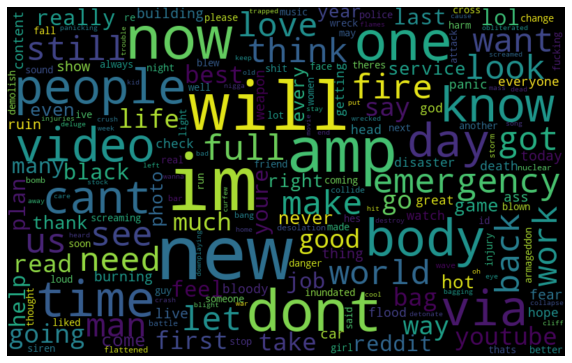

In [ ]:
#fake target
from wordcloud import WordCloud
fake_data = data[data["target"] == 0]
all_words = ' '.join([text for text in fake_data.text_copy])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

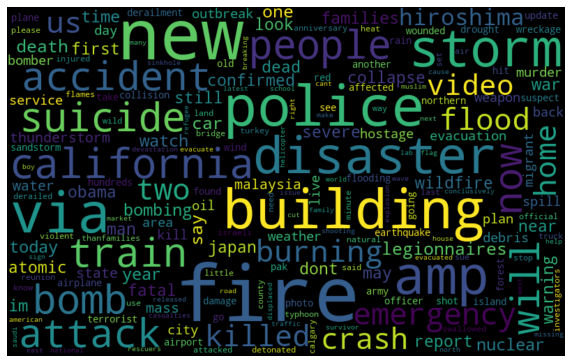

In [ ]:
#for real target
from wordcloud import WordCloud
real_data = data[data["target"] == 1]
all_words = ' '.join([text for text in real_data.text_copy])
wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110,
 collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

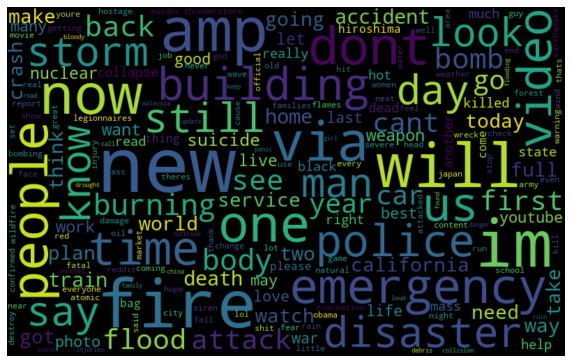

In [ ]:
from wordcloud import WordCloud
mix_data = data
all_words = ' '.join([text for text in mix_data.text_copy])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Keep only text and target column in the dataset

In [ ]:
data.drop(['id','location','keyword'] ,inplace=True, axis=1)
data.head()

,text,target,text_copy
31,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,bbcmtd wholesale markets ablaze
32,We always try to bring the heavy. #metal #RT h...,0,we always try to bring the heavy metal it
33,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,africanbaze breaking newsnigeria flag set abla...
34,Crying out for more! Set me ablaze,0,crying out for more set me ablaze
35,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,on plus side look at the sky last night it was...


Split data into train and validation

In [ ]:
from sklearn.model_selection import train_test_split
X = data['text_copy']
y = data['target']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val  = train_test_split(X, y, test_size=0.2, random_state=1)
print("training dataset x:",'\n',X_train,'\n',"training dataset y:",'\n',y_train,'\n',"validation dataset x:",'\n',X_val,'\n',"validation dataset y:",'\n',y_val)

training dataset x: 
 2850    elm poo helping the displaced from the rocky f...
4589    manic what a fucking idiot he had a gun amp a ...
2941    so i pick myself off the ground and swam befor...
1547    nueva favorite emergency feat the chemical bro...
66      ablaze what time does your talk go until i don...
                              ...                        
4288    beware of your temper and a loose tongue these...
4091                          hailed man you kno im there
1373    drought fuels bush fires in jamaicajamaicaobse...
5917    godofmischief of louis daggers she pulled it o...
374     potus appoints brig gen richard i kaiser as me...
Name: text_copy, Length: 4064, dtype: object 
 training dataset y: 
 2850    1
4589    1
2941    1
1547    0
66      0
       ..
4288    0
4091    0
1373    1
5917    1
374     0
Name: target, Length: 4064, dtype: int64 
 validation dataset x: 
 1055    asymbina tithenai im hampered by only liking c...
5052    capitol natural disasterhosp

Print the count of unique words

In [ ]:
whole_frq = data['text_copy'].apply(lambda x:pd.value_counts(x.split(" "))).sum(axis=0)
whole_frq

ablaze        23.0
wholesale      4.0
markets        4.0
bbcmtd         1.0
always        29.0
              ... 
widdahes       1.0
shoutout       1.0
fore           1.0
trading        1.0
engineered     1.0
Length: 12694, dtype: float64

In [ ]:
word_tot=[] #this is for storing the total no of unique words in whole training dataset
word_tot = X_train.apply(lambda x:(x.split(" "))).sum(axis=0)
whole_train_freq = X_train.apply(lambda x:pd.value_counts(x.split(" "))).sum(axis=0) #this is to store the count of each unique keyword
whole_train_freq=whole_train_freq.sort_values()
print(whole_train_freq)
words_tot={}
words_tot = dict(Counter(word_tot))
words_tot= dict(sorted(words_tot.items(),key=lambda x: x[1]))
print(words_tot)

masochisticmage       1.0
fotos                 1.0
zurich                1.0
decembergreen         1.0
swiss                 1.0
                    ...  
of                  956.0
in                 1022.0
to                 1055.0
a                  1169.0
the                1754.0
Length: 11082, dtype: float64
{'manic': 1, 'terminated': 1, 'swam': 1, 'bounced': 1, 'suffice': 1, 'nueva': 1, 'deezercolombia': 1, 'cuban': 1, 'extends': 1, 'sympathy': 1, 'newswatchvehicles': 1, 'lock': 1, 'landsdowne': 1, 'emerg': 1, 'robert': 1, 'mueller': 1, 'vamp': 1, 'meson': 1, 'coastguard': 1, 'remaining': 1, 'sections': 1, 'graystone': 1, 'watchman': 1, 'suresh': 1, 'smusxskype': 1, 'drakes': 1, 'ghostwriting': 1, 'rihanna': 1, 'andweather': 1, 'afterlife': 1, 'darkndtatted': 1, 'holmes': 1, 'sods': 1, 'diverted': 1, 'girion': 1, 'dacherryontopohh': 1, 'caixxum': 1, 'ofwest': 1, 'burton': 1, 'messnermatthew': 1, 'newcity': 1, 'thetshirtkid': 1, 'statistically': 1, 'palin': 1, 'targeting': 1, 'mi

Compute the Term-Document Matrix (TDM) for all classes.

In [ ]:
#TDM FOR WHOLE DATASET
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer()
X1 = vectorizer1.fit_transform(data['text_copy'])
analyze = vectorizer1.build_analyzer()
print(vectorizer1.get_feature_names())
print(X1.toarray())

['aaaaaaallll', 'aaaaaand', 'aannnnd', 'aaronthefm', 'aashiqui', 'aba', 'abandon', 'abandoned', 'abandoning', 'abbott', 'abbruchsimulator', 'abbswinston', 'abbyairshow', 'abc', 'abcnorio', 'abcs', 'abe', 'aberdeen', 'aberdeenfanpagegood', 'aberystwythshrewsbury', 'ability', 'abject', 'ablaze', 'able', 'abninfvet', 'abomination', 'abortion', 'about', 'aboutampm', 'aboutcalories', 'aboutfeet', 'aboutfollowers', 'abouthours', 'aboutmiles', 'aboutnigerian', 'aboutother', 'aboutpalestinian', 'abouttodays', 'above', 'abrams', 'absolute', 'absolutely', 'absolutsumya', 'abstract', 'absurd', 'absurdly', 'abuse', 'abused', 'abuseddesolateamplost', 'abuses', 'abusing', 'abysmaljoiner', 'ac', 'acarewornheart', 'acc', 'accept', 'accepts', 'access', 'accident', 'accidental', 'accidentally', 'accidentalprophecy', 'accidently', 'accidents', 'accidentscar', 'accidentwho', 'accompanying', 'according', 'account', 'accounts', 'accuracy', 'accused', 'accuses', 'accustomed', 'acebabes', 'acebreakingnews', '

In [ ]:
#TDM FOR CLASS 0
vectorizer2 = CountVectorizer()
data_0 = data[data['target']==0]
X2 = vectorizer2.fit_transform(data_0['text_copy'])
print(vectorizer2.get_feature_names())
print(X2.toarray())

['aannnnd', 'aaronthefm', 'aba', 'abandon', 'abandoning', 'abbott', 'abbruchsimulator', 'abc', 'aberdeen', 'aberdeenfanpagegood', 'ability', 'abject', 'ablaze', 'able', 'abomination', 'abortion', 'about', 'aboutampm', 'aboutcalories', 'aboutfeet', 'aboutfollowers', 'aboutother', 'abouttodays', 'above', 'absolutely', 'absolutsumya', 'abstract', 'absurdly', 'abuse', 'abused', 'abuseddesolateamplost', 'abysmaljoiner', 'ac', 'acarewornheart', 'accept', 'accepts', 'access', 'accident', 'accidentally', 'accidentalprophecy', 'accidently', 'accidents', 'accidentscar', 'accompanying', 'according', 'account', 'accused', 'accuses', 'accustomed', 'acebabes', 'achieve', 'achievement', 'achieving', 'aching', 'ackman', 'acne', 'acoustic', 'acquisitions', 'acronym', 'across', 'act', 'acted', 'actin', 'acting', 'action', 'actions', 'activate', 'activated', 'active', 'activist', 'activities', 'activity', 'actor', 'actual', 'actually', 'ad', 'adam', 'add', 'added', 'addiction', 'addicts', 'adding', 'addi

In [ ]:
#TDM FOR CLASS 1
vectorizer3 = CountVectorizer()
data_1  = data[data['target']==1]
X3 = vectorizer3.fit_transform(data_1['text_copy'])
print(vectorizer3.get_feature_names())
print(X3.toarray())

['aaaaaaallll', 'aaaaaand', 'aashiqui', 'aba', 'abandon', 'abandoned', 'abbswinston', 'abbyairshow', 'abc', 'abcnorio', 'abcs', 'abe', 'aberystwythshrewsbury', 'ablaze', 'able', 'abninfvet', 'abortion', 'about', 'abouthours', 'aboutmiles', 'aboutnigerian', 'aboutpalestinian', 'above', 'abrams', 'absolute', 'absurd', 'abuse', 'abuseddesolateamplost', 'abuses', 'abusing', 'ac', 'acc', 'accept', 'accident', 'accidental', 'accidentally', 'accidents', 'accidentwho', 'according', 'account', 'accounts', 'accuracy', 'accused', 'accuses', 'acebreakingnews', 'ached', 'acid', 'acne', 'acquire', 'acquired', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'activated', 'activates', 'activist', 'activity', 'actress', 'acts', 'actually', 'acute', 'ad', 'adamantly', 'adamnibloe', 'adamtuss', 'add', 'added', 'addict', 'adding', 'address', 'adjust', 'adjustable', 'admin', 'administration', 'adriasimon', 'adult', 'adultblackmale', 'adults', 'advance', 'adverse', 'advised', 'advisory', 'aegdriven'

Print the dataframe with number of columns = number of unique words and the row showing the count of that word in a sentence.

In [ ]:
#for whole dataset
df = pd.DataFrame(X1.toarray(), columns=[vectorizer1.get_feature_names()])
df

,aaaaaaallll,aaaaaand,aannnnd,aaronthefm,aashiqui,aba,abandon,abandoned,abandoning,abbott,abbruchsimulator,abbswinston,abbyairshow,abc,abcnorio,abcs,abe,aberdeen,aberdeenfanpagegood,aberystwythshrewsbury,ability,abject,ablaze,able,abninfvet,abomination,abortion,about,aboutampm,aboutcalories,aboutfeet,aboutfollowers,abouthours,aboutmiles,aboutnigerian,aboutother,aboutpalestinian,abouttodays,above,abrams,...,yuri,yuuko,yycfringe,yycstorm,yycwalks,zach,zaibatsunews,zairespecialguest,zakbagans,zamtriossu,zany,zarharzar,zaynmaiikist,zeal,zenandemcfen,zenith,zenoglononium,zeppfrobeusns,zergele,zero,zhenghxn,zimbabwe,zimmer,zimpapersviews,zionism,zionist,zip,zipline,zodiac,zojadelin,zomatoaus,zombie,zombiefunrun,zombies,zone,zones,zoom,zotarskeleton,zurich,zxathetis
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5075,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5076,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5077,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#for class 0
df1 = pd.DataFrame(X2.toarray(), columns=[vectorizer2.get_feature_names()])
df1

,aannnnd,aaronthefm,aba,abandon,abandoning,abbott,abbruchsimulator,abc,aberdeen,aberdeenfanpagegood,ability,abject,ablaze,able,abomination,abortion,about,aboutampm,aboutcalories,aboutfeet,aboutfollowers,aboutother,abouttodays,above,absolutely,absolutsumya,abstract,absurdly,abuse,abused,abuseddesolateamplost,abysmaljoiner,ac,acarewornheart,accept,accepts,access,accident,accidentally,accidentalprophecy,...,youngheroesidlava,youngsafe,your,youre,yours,yourself,youssefyamani,youth,youtube,youve,youwould,yuan,yuki,yum,yup,yuppies,yuri,yuuko,zach,zairespecialguest,zakbagans,zamtriossu,zany,zarharzar,zenandemcfen,zenith,zenoglononium,zeppfrobeusns,zero,zhenghxn,zimbabwe,zip,zipline,zodiac,zombie,zombiefunrun,zombies,zone,zoom,zxathetis
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2880,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2881,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#for class 1
df3 = pd.DataFrame(X3.toarray(), columns=[vectorizer3.get_feature_names()])
df3

,aaaaaaallll,aaaaaand,aashiqui,aba,abandon,abandoned,abbswinston,abbyairshow,abc,abcnorio,abcs,abe,aberystwythshrewsbury,ablaze,able,abninfvet,abortion,about,abouthours,aboutmiles,aboutnigerian,aboutpalestinian,above,abrams,absolute,absurd,abuse,abuseddesolateamplost,abuses,abusing,ac,acc,accept,accident,accidental,accidentally,accidents,accidentwho,according,account,...,yolanda,york,yorker,yorktrucks,you,youd,youll,young,younger,youngheroesid,your,youre,yours,yourself,yourselves,youth,youtube,youve,ypres,ypu,yr,yycfringe,yycstorm,yycwalks,zaibatsunews,zakbagans,zaynmaiikist,zeal,zergele,zimmer,zimpapersviews,zionism,zionist,zojadelin,zomatoaus,zombie,zone,zones,zotarskeleton,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Frequency of words in class 0 and 1

In [ ]:
from collections import Counter
class1_data = X_train[y_train==1] #extracting that data which has target=1
freq_1=[] # this is for storing the count of unique keyword
word_1=[]#this is a list defined to store the unique words get after splitting
words_1=dict.fromkeys(words_tot.keys(),0) #this is done to assign all uniuqe words present in dataset as  0
word_1 = class1_data.apply(lambda x:(x.split(" "))).sum(axis=0)
freq_1 = class1_data.apply(lambda x:pd.value_counts(x.split(" "))).sum(axis=0)
freq_1=freq_1.sort_values()
words_1_dup = dict(Counter(word_1)) #this is the dictionary of unique words including the cwords from dataset as well as for some words count maybe zero in particular class
print("THE FREQUENCY FOR CLASS 1",'\n',freq_1)
#words_1 = dict(Counter(word_1))
#to fill values of unique words we got
for i in words_1_dup:
  words_1[i] = words_1_dup[i]
#for sorting 
words_1 = dict(sorted(words_1.items(),key=lambda x: x[1]))
print(words_1,sum(words_1.values()))
# class1_data

THE FREQUENCY FOR CLASS 1 
 senfeinsteinthanks      1.0
alarmtwitter            1.0
glass                   1.0
window                  1.0
turns                   1.0
                      ...  
to                    420.0
of                    465.0
a                     525.0
in                    597.0
the                   733.0
Length: 6014, dtype: float64
{'nueva': 0, 'deezercolombia': 0, 'robert': 0, 'mueller': 0, 'vamp': 0, 'meson': 0, 'remaining': 0, 'sections': 0, 'graystone': 0, 'watchman': 0, 'smusxskype': 0, 'afterlife': 0, 'darkndtatted': 0, 'holmes': 0, 'caixxum': 0, 'thetshirtkid': 0, 'statistically': 0, 'tanslash': 0, 'snowflake': 0, 'responsible': 0, 'surely': 0, 'stilly': 0, 'safferoonicle': 0, 'yell': 0, 'robertson': 0, 'wakeupflorida': 0, 'floridians': 0, 'trophyhunt': 0, 'killers': 0, 'navigate': 0, 'audit': 0, 'reshape': 0, 'minerals': 0, 'crystal': 0, 'feelin': 0, 'repped': 0, 'laura': 0, 'thejonesesvoice': 0, 'linguistic': 0, 'lampoons': 0, 'bye': 0, 'gargoyle

In [ ]:
from collections import Counter
class0_data = X_train[y_train==0]
freq_0=[]  # this is for storing the count of unique keyword
word_0=[] #this is a list defined to store the unique words get after splitting
words_0=dict.fromkeys(words_tot.keys(),0)
word_0 = class0_data.apply(lambda x:(x.split(" "))).sum(axis=0)
freq_0 = class0_data.apply(lambda x:pd.value_counts(x.split(" "))).sum(axis=0)
freq_0=freq_0.sort_values()
words_0_dup = dict(Counter(word_0))
print("THE FREQUENCY FOR CLASS 0",'\n',freq_0,'\n')
# word_0 = set(word_0)
for i in words_0_dup:
  words_0[i] = words_0_dup[i]
words_0 = dict(sorted(words_0.items(),key=lambda x: x[1]))
print(words_0)

THE FREQUENCY FOR CLASS 0 
 returns             1.0
maytag              1.0
wrestler            1.0
wantmyabsback       1.0
bleachers           1.0
                  ...  
of                491.0
to                635.0
a                 644.0
i                 678.0
the              1021.0
Length: 7619, dtype: float64 

{'manic': 0, 'terminated': 0, 'swam': 0, 'bounced': 0, 'suffice': 0, 'cuban': 0, 'extends': 0, 'sympathy': 0, 'newswatchvehicles': 0, 'lock': 0, 'landsdowne': 0, 'emerg': 0, 'coastguard': 0, 'suresh': 0, 'drakes': 0, 'ghostwriting': 0, 'rihanna': 0, 'andweather': 0, 'sods': 0, 'diverted': 0, 'girion': 0, 'dacherryontopohh': 0, 'ofwest': 0, 'burton': 0, 'messnermatthew': 0, 'newcity': 0, 'palin': 0, 'targeting': 0, 'minority': 0, 'earnest': 0, 'fletch': 0, 'coldblooded': 0, 'demonstrations': 0, 'doctorfluxx': 0, 'stefanejones': 0, 'spinnellii': 0, 'themermacorn': 0, 'embarrassing': 0, 'ruining': 0, 'deadinjureddisplaced': 0, 'syriavisitus': 0, 'slingers': 0, 'norwaymfa'

Does the sum of the unique words in target 0 and 1 sum upto the total number of unique words in the whole document? Why or why not? Explain in report.

Total frequency

In [ ]:
#frequency of unique words in whole
print("THE LENGTH OF ALL UNIUQE WORDS IN WHOLE DOCUMENT IS:",len(whole_frq),'\n')

THE LENGTH OF ALL UNIUQE WORDS IN WHOLE DOCUMENT IS: 12694 



In [ ]:
#frequency of unique words in whole_train
print(" ALL UNIUQE WORDS IN TRAIN IS:",len(whole_train_freq),'\n')

 ALL UNIUQE WORDS IN TRAIN IS: 11082 



In [ ]:
#frequency of unique words in class 0
print("ALL UNIQUE WORDS IN TARGET CLASS = 0 IS:",len(freq_0),'\n')

ALL UNIQUE WORDS IN TARGET CLASS = 0 IS: 7619 



In [ ]:
#frequency of unique words in class 1
print("ALL UNIQUE WORDS IN TARGET CLASS = 1 IS:",len(freq_1),'\n')

ALL UNIQUE WORDS IN TARGET CLASS = 1 IS: 6014 



In [ ]:
#sum of frquency of class 1 and class 2
print("UNIQUE KEYWORDS IN CLASS 0 AND CLASS 1 IS:",(len(freq_0) + len(freq_1)))

UNIQUE KEYWORDS IN CLASS 0 AND CLASS 1 IS: 13633


Calculate the probability for each word in a given class.

Class 0

In [ ]:
prob_0=dict.fromkeys(words_tot.keys(),0) #this is for the purpose if some word of whole dataset not present in class 0 it will get 0 probability
#we traversing in unique words of whole training dataset and then fill the values in class 0 probability based on intersection
for key in words_0.keys():
   prob_0[key] = words_0[key]/(sum(words_0.values()))
#prob_0 = len(freq_0)/len(whole_frq)
prob_0= dict(sorted(prob_0.items(),key=lambda x: x[1]))
print("THE PROB_0 LIST IS",'\n',prob_0)
print("THE SUM OF PROB_0 IS",sum(prob_0.values()))

THE PROB_0 LIST IS 
 {'manic': 0.0, 'terminated': 0.0, 'swam': 0.0, 'bounced': 0.0, 'suffice': 0.0, 'cuban': 0.0, 'extends': 0.0, 'sympathy': 0.0, 'newswatchvehicles': 0.0, 'lock': 0.0, 'landsdowne': 0.0, 'emerg': 0.0, 'coastguard': 0.0, 'suresh': 0.0, 'drakes': 0.0, 'ghostwriting': 0.0, 'rihanna': 0.0, 'andweather': 0.0, 'sods': 0.0, 'diverted': 0.0, 'girion': 0.0, 'dacherryontopohh': 0.0, 'ofwest': 0.0, 'burton': 0.0, 'messnermatthew': 0.0, 'newcity': 0.0, 'palin': 0.0, 'targeting': 0.0, 'minority': 0.0, 'earnest': 0.0, 'fletch': 0.0, 'coldblooded': 0.0, 'demonstrations': 0.0, 'doctorfluxx': 0.0, 'stefanejones': 0.0, 'spinnellii': 0.0, 'themermacorn': 0.0, 'embarrassing': 0.0, 'ruining': 0.0, 'deadinjureddisplaced': 0.0, 'syriavisitus': 0.0, 'slingers': 0.0, 'norwaymfa': 0.0, 'bahrain': 0.0, 'royalcarribean': 0.0, 'randersonwatching': 0.0, 'recordhigh': 0.0, 'levels': 0.0, 'touched': 0.0, 'seemeth': 0.0, 'thereof': 0.0, 'daytonarea': 0.0, 'cyber': 0.0, 'saint': 0.0, 'license': 0.0, '

Class 1

In [ ]:
prob_1=dict.fromkeys(words_tot.keys(),0)
for key in words_1.keys():
   prob_1[key] = words_1[key]/(sum(words_1.values()))
#prob_0 = len(freq_0)/len(whole_frq)
prob_1= dict(sorted(prob_1.items(),key=lambda x: x[1]))
print("THE PROB_0 LIST IS",'\n',prob_1)
print("THE SUM OF PROB_1 IS",sum(prob_1.values()))
# prob_0_update={}

THE PROB_0 LIST IS 
 {'nueva': 0.0, 'deezercolombia': 0.0, 'robert': 0.0, 'mueller': 0.0, 'vamp': 0.0, 'meson': 0.0, 'remaining': 0.0, 'sections': 0.0, 'graystone': 0.0, 'watchman': 0.0, 'smusxskype': 0.0, 'afterlife': 0.0, 'darkndtatted': 0.0, 'holmes': 0.0, 'caixxum': 0.0, 'thetshirtkid': 0.0, 'statistically': 0.0, 'tanslash': 0.0, 'snowflake': 0.0, 'responsible': 0.0, 'surely': 0.0, 'stilly': 0.0, 'safferoonicle': 0.0, 'yell': 0.0, 'robertson': 0.0, 'wakeupflorida': 0.0, 'floridians': 0.0, 'trophyhunt': 0.0, 'killers': 0.0, 'navigate': 0.0, 'audit': 0.0, 'reshape': 0.0, 'minerals': 0.0, 'crystal': 0.0, 'feelin': 0.0, 'repped': 0.0, 'laura': 0.0, 'thejonesesvoice': 0.0, 'linguistic': 0.0, 'lampoons': 0.0, 'bye': 0.0, 'gargoyle': 0.0, 'hoof': 0.0, 'coil': 0.0, 'brand': 0.0, 'untill': 0.0, 'announce': 0.0, 'dull': 0.0, 'monotonous': 0.0, 'uv': 0.0, 'ginlistia': 0.0, 'mousse': 0.0, 'fuckin': 0.0, 'wholenotherit': 0.0, 'ethernet': 0.0, 'tonguetwister': 0.0, 'smiles': 0.0, 'baileysmsteach

We have calculated the probability of occurrence of word in a class, we can now substitute the values in the Baye's equation. 

If a word from the new sentence does not occur in the class within the training set, the equation becomes zero. This problem can be solved using smoothing like Laplace smoothing. 

In [ ]:
#laplace smoothing 
alpha = 1

In [ ]:
#for smoothing formula will be applied is p(x|c) = (N(x|c) + alpha)/(N(c)+alpha*N(total))
#N(c) is equal to the SUM OF number of words in all the class c messages
#N(total) is equal to number of unique words in training dataset
#alpha is smoothing parameter
#N(x|c) is the count of unique word present in class c

In [ ]:
prob_0_smooth= dict.fromkeys(words_tot.keys(),0)
for key in words_tot.keys():
  m = (words_0[key]+(alpha))/((sum(words_0.values()))+ alpha*(len(whole_train_freq)))
  prob_0_smooth[key]=m
#prob_0 = len(freq_0)/len(whole_frq)
print("THE PROB_0_LAPLACE SMOOTHING LIST IS",'\n',prob_0_smooth)
print("THE SUM OF PROB_0_SMOOTH IS",sum(prob_0_smooth.values()))

THE PROB_0_LAPLACE SMOOTHING LIST IS 
 {'manic': 2.371972769752603e-05, 'terminated': 2.371972769752603e-05, 'swam': 2.371972769752603e-05, 'bounced': 2.371972769752603e-05, 'suffice': 2.371972769752603e-05, 'nueva': 4.743945539505206e-05, 'deezercolombia': 4.743945539505206e-05, 'cuban': 2.371972769752603e-05, 'extends': 2.371972769752603e-05, 'sympathy': 2.371972769752603e-05, 'newswatchvehicles': 2.371972769752603e-05, 'lock': 2.371972769752603e-05, 'landsdowne': 2.371972769752603e-05, 'emerg': 2.371972769752603e-05, 'robert': 4.743945539505206e-05, 'mueller': 4.743945539505206e-05, 'vamp': 4.743945539505206e-05, 'meson': 4.743945539505206e-05, 'coastguard': 2.371972769752603e-05, 'remaining': 4.743945539505206e-05, 'sections': 4.743945539505206e-05, 'graystone': 4.743945539505206e-05, 'watchman': 4.743945539505206e-05, 'suresh': 2.371972769752603e-05, 'smusxskype': 4.743945539505206e-05, 'drakes': 2.371972769752603e-05, 'ghostwriting': 2.371972769752603e-05, 'rihanna': 2.3719727697

In [ ]:
prob_1_smooth= dict.fromkeys(words_tot.keys(),0)
for key in words_tot.keys():
  m = (words_1[key]+(alpha))/((sum(words_1.values()))+ alpha*(len(whole_train_freq)))
  prob_1_smooth[key]=m
#prob_0 = len(freq_0)/len(whole_frq)
print("THE PROB_1_LAPLACE SMOOTHING LIST IS",'\n',prob_1_smooth)
print("THE SUM OF PROB_1_SMOOTH IS",sum(prob_1_smooth.values()))

THE PROB_1_LAPLACE SMOOTHING LIST IS 
 {'manic': 5.66331587144273e-05, 'terminated': 5.66331587144273e-05, 'swam': 5.66331587144273e-05, 'bounced': 5.66331587144273e-05, 'suffice': 5.66331587144273e-05, 'nueva': 2.831657935721365e-05, 'deezercolombia': 2.831657935721365e-05, 'cuban': 5.66331587144273e-05, 'extends': 5.66331587144273e-05, 'sympathy': 5.66331587144273e-05, 'newswatchvehicles': 5.66331587144273e-05, 'lock': 5.66331587144273e-05, 'landsdowne': 5.66331587144273e-05, 'emerg': 5.66331587144273e-05, 'robert': 2.831657935721365e-05, 'mueller': 2.831657935721365e-05, 'vamp': 2.831657935721365e-05, 'meson': 2.831657935721365e-05, 'coastguard': 5.66331587144273e-05, 'remaining': 2.831657935721365e-05, 'sections': 2.831657935721365e-05, 'graystone': 2.831657935721365e-05, 'watchman': 2.831657935721365e-05, 'suresh': 5.66331587144273e-05, 'smusxskype': 2.831657935721365e-05, 'drakes': 5.66331587144273e-05, 'ghostwriting': 5.66331587144273e-05, 'rihanna': 5.66331587144273e-05, 'andwe

Probability for class 0

In [ ]:
# post_0 = {}
# for i in range(len(prob_0_smooth)):
#   m = prob_0_smooth[i]*prior_0
#   post_0.append(m)
# print("THE POSTERIOR PROBABILITY FOR EACH UNIQUE WORD FOR CLASS 0:",'\n',post_0)
#for class 0
sample_0 = y_train[y_train==0]
length_sample_0 = len(sample_0)
print("THE LENGTH OF SAMPLES HAVING CLASS=0 IN TRAINING DATASET",length_sample_0)

#for class 1
sample_1 = y_train[y_train==1]
length_sample_1 = len(sample_1)
print("THE LENGTH OF SAMPLES HAVING CLASS=0 IN TRAINING DATASET",length_sample_1)

#total length of sample
total = length_sample_0 + length_sample_1
print("THE LENGTH OF SAMPLES IN TRAINING DATASET",total)

THE LENGTH OF SAMPLES HAVING CLASS=0 IN TRAINING DATASET 2275
THE LENGTH OF SAMPLES HAVING CLASS=0 IN TRAINING DATASET 1789
THE LENGTH OF SAMPLES IN TRAINING DATASET 4064


In [ ]:
#prior probability for class 0
prior_0 = length_sample_0/total
print("THE PRIOR FOR CLASS 0 IS:",prior_0)

THE PRIOR FOR CLASS 0 IS: 0.5597933070866141


Probability for class 1

In [ ]:
prior_1 = length_sample_1/total
print("THE PRIOR FOR CLASS 1 IS:",prior_1)

THE PRIOR FOR CLASS 1 IS: 0.4402066929133858


Print target class

In [ ]:
def classify(tweet):
  tweet = tweet.split()
  p_0_given_tweet = prior_0
  p_1_given_tweet = prior_1
  for word in tweet:
      if word in prob_0_smooth.keys():
         p_0_given_tweet *= prob_0_smooth[word]

      if word in prob_1_smooth.keys(): 
         p_1_given_tweet*= prob_1_smooth[word]
  # print('P(0|tweet):', p_0_given_tweet)
  # print('P(1|tweet):', p_1_given_tweet)
  if p_0_given_tweet > p_1_given_tweet:
    return 0
  elif p_1_given_tweet >= p_0_given_tweet:
    return 1

In [ ]:
df_val = pd.DataFrame(list(X_val),columns=['TEST_TWEET'])
df_val['TARGET'] = list(y_val)
df_val

,TEST_TWEET,TARGET
0,asymbina tithenai im hampered by only liking c...,0
1,capitol natural disasterhospital crisis someth...,1
2,kidnapped ladies rescued by police in enough n...,1
3,my baby girls car wreak this afternoon thank g...,1
4,themagickidraps not upset with a rally upset w...,1
...,...,...
1011,family members of osama bin laden have died in...,1
1012,trains derailment its the freakiest of freak a...,1
1013,will be dropping fire selfie tomorrow saying y...,0
1014,twelve feared killed in pakistani air ambulanc...,1


In [ ]:

df_val['PREDICTED'] = df_val['TEST_TWEET'].apply(lambda tweet:classify(tweet))
df_val.head(10)

,TEST_TWEET,TARGET,PREDICTED
0,asymbina tithenai im hampered by only liking c...,0,0
1,capitol natural disasterhospital crisis someth...,1,1
2,kidnapped ladies rescued by police in enough n...,1,1
3,my baby girls car wreak this afternoon thank g...,1,0
4,themagickidraps not upset with a rally upset w...,1,1
5,reddit new content policy goes into effect man...,0,0
6,hellfire ep silentmind amp bookofdaniel,0,0
7,khalidkkazi mate theyve taken anothersince i p...,1,0
8,cyclone by double i would be the cherry on top...,0,0
9,senator alarmed by reports us military familie...,1,1


In [ ]:
def compute_tp_tn_fn_fp(y_act, y_pred):
  tp=0
  tn=0
  fp=0
  fn=0
  
  for i in range(len(y_pred)):
    if y_act[i] == y_pred[i]==1:
      tp = tp + 1
    if y_act[i]==y_pred[i]==0:
      tn = tn + 1
    if y_pred[i]==1 and y_act[i]!=y_pred[i]:
      fp = fp + 1
    if y_pred[i]==0 and y_act[i]!=y_pred[i]:
      fn = fn + 1
  return tp, tn, fp, fn

In [ ]:
tp, tn, fp, fn = compute_tp_tn_fn_fp(df_val.TARGET, df_val.PREDICTED)
print('TP :', tp)
print('TN :', tn)
print('FP :', fp)
print('FN :', fn)

TP : 285
TN : 523
FP : 86
FN : 122


In [ ]:
def compute_accuracy(tp, tn, fn, fp):
  acc = 100*((tn + tp)/(tn + fp + tp +fn))
  return acc

In [ ]:
print('Accuracy  :', compute_accuracy(tp, tn, fn, fp))

Accuracy  : 79.52755905511812


In [ ]:
def compute_precision(tp,fp):
  precision = 100*(tp/(tp + fp))
  return precision

In [ ]:
print('Precision :', compute_precision(tp,fp))

Precision : 76.81940700808624


In [ ]:
def compute_recall(tp,fn):
  recal = 100*(tp/(tp + fn))
  return recal 

In [ ]:
print('Recall :', compute_recall(tp,fn))

Recall : 70.02457002457002


In [ ]:
def compute_f1_score(y_true, y_pred):
  # calculates the F1 score. Complete function
  tp,tn,fp,fn = compute_tp_tn_fn_fp(y_true, y_pred)
  rec = compute_recall(tp,fn)
  prec = compute_precision(tp,fp)
  f1_score = (2*((prec*rec)/(prec + rec)))/100
  return f1_score

In [ ]:
print('F1 :', compute_f1_score(df_val.TARGET, df_val.PREDICTED))

F1 : 0.7326478149100256


CHECK USING SKLEARN

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy  :', 100* accuracy_score(df_val.TARGET, 
                                                           df_val.PREDICTED))

Accuracy  : 79.52755905511812


In [ ]:
from sklearn.metrics import precision_score
print('Precision :', 100* precision_score(df_val.TARGET, 
                                                           df_val.PREDICTED))

Precision : 76.81940700808624


In [ ]:
from sklearn.metrics import recall_score
print('Recall :', 100* recall_score(df_val.TARGET, 
                                                           df_val.PREDICTED))

Recall : 70.02457002457002


In [ ]:
from sklearn.metrics import f1_score
print('F1 score :', 100* f1_score(df_val.TARGET, 
                                                           df_val.PREDICTED))

F1 score : 73.26478149100257


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(df_val.TARGET, df_val.PREDICTED).ravel()
print('TN :', confusion_matrix[0])
print('TP :', confusion_matrix[3])
print('FP :', confusion_matrix[1])
print('FN :', confusion_matrix[2])

TN : 523
TP : 285
FP : 86
FN : 122


References:

[Ref1](https://sebastianraschka.com/Articles/2014_naive_bayes_1.html)